# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры, причем, нужно довести метрику до 0.59. И проверить *F1*-меру на тестовой выборке.

Дополнительно будем измерять *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-качества-данных" data-toc-modified-id="Проверка-качества-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка качества данных</a></span></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li><li><span><a href="#Формирование-обучающей,-валидационной-и-тестовой-выборок" data-toc-modified-id="Формирование-обучающей,-валидационной-и-тестовой-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Формирование обучающей, валидационной и тестовой выборок</a></span></li><li><span><a href="#Маштабирование-признаков" data-toc-modified-id="Маштабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Маштабирование признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Прорверка-баланса-классов" data-toc-modified-id="Прорверка-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Прорверка баланса классов</a></span></li><li><span><a href="#Подбор-гиперпараметров-моделей" data-toc-modified-id="Подбор-гиперпараметров-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подбор гиперпараметров моделей</a></span></li><li><span><a href="#Сравнение-метрик-моделей" data-toc-modified-id="Сравнение-метрик-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнение метрик моделей</a></span></li><li><span><a href="#ROC-кривые-моделей" data-toc-modified-id="ROC-кривые-моделей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>ROC-кривые моделей</a></span></li><li><span><a href="#Сравнение-доли-верных-ответов-моделей" data-toc-modified-id="Сравнение-доли-верных-ответов-моделей-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сравнение доли верных ответов моделей</a></span></li><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li><li><span><a href="#Сравнение-матрицы-ошибок" data-toc-modified-id="Сравнение-матрицы-ошибок-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Сравнение матрицы ошибок</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-исследования" data-toc-modified-id="Вывод-по-результатам-исследования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по результатам исследования</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

Загрузим необходимые для выполнения проекта библиотеки и функции.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', False)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Загрузим данные и посмотрим на первые 10 строк таблицы. Путь к файлу: `/datasets/Churn.csv` (Churn - англ. «отток клиентов»).

In [2]:
data = pd.read_csv(r'C:\Users\Nikolay\OneDrive\Документы\Practicum\Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8.00,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4.00,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2.00,"134,603.88",1,1,1,"71,725.73",0


Описание данных

Признаки (features):

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname`— фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак (target):

- `Exited` — факт ухода клиента

Целевой признак имеет только два категориальных значения, следовательно, имеем задачу бинарной классификации.

### Проверка качества данных

Посмотрим на общую информацию исходного датасета:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что типы данных в столбцах корректные. Также замечаем, что в столбце `Tenure`(сколько лет человек является клиентом банка) есть пропуски:

In [4]:
data['Tenure'].isnull().sum()

909

В столбце `Tenure` наблюдаем 909 не заполненных значения. Чтобы решить, чем их заполнить посмотрим на разброс значений:

Text(0, 0.5, 'годы')

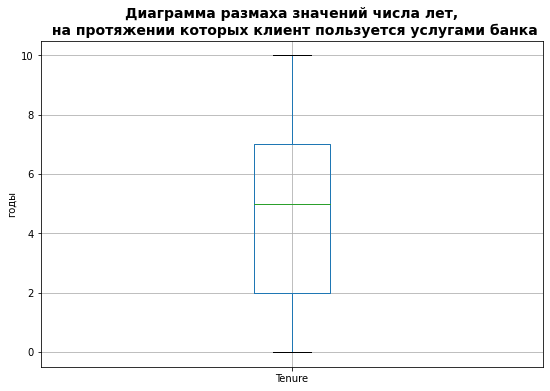

In [5]:
data.boxplot(column=['Tenure'], figsize=(9, 6))
plt.title('Диаграмма размаха значений числа лет,\n на протяжении которых клиент пользуется услугами банка', fontsize=14, fontweight='bold')
plt.ylabel('годы')

Большинство клиентов пользуется услугами банка от 2-х до 7-ми лет. 

In [6]:
print('Среднее значение:', data['Tenure'].mean())
print('Медианное значение:', data['Tenure'].median())

Среднее значение: 4.997690023099769
Медианное значение: 5.0


Целесоорбразно заменить пропуски наиболее характерным, то есть медианным значением (хотя можно использовать и среднее значение, так как для данного набора данных их значения практически не отличаются):

In [7]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [8]:
data['Tenure'].isnull().sum()

0

Теперь проверим если ли в данных задублированные строки:

In [9]:
data.duplicated().sum()

0

Задублированных строк в данных нет. Далее исследуем столбцы:

In [10]:
data['CustomerId'].duplicated().sum()

0

In [11]:
data['CustomerId'].value_counts().sum()

10000

In [12]:
data['Surname'].duplicated().sum()

7068

In [13]:
data['Surname'].value_counts().sum()

10000

In [14]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
data[['CreditScore', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Balance,EstimatedSalary
count,"10,000.00","10,000.00","10,000.00"
mean,650.53,"76,485.89","100,090.24"
std,96.65,"62,397.41","57,510.49"
min,350.00,0.00,11.58
25%,584.00,0.00,"51,002.11"
50%,652.00,"97,198.54","100,193.91"
75%,718.00,"127,644.24","149,388.25"
max,850.00,"250,898.09","199,992.48"


In [17]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [18]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [19]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [20]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Для последующего машинного обучения имеющиеся исходные данные необходимо оптимизировать, а именно:

- столбец `RowNumber` — индекс строки в данных дублирует информацию стандартного датафрейма и не имеет ценности для обучения модели, поэтому его можно удалить
- столбец `CustomerId` — уникальный идентификатор клиента имеет 10000 уникальных значений, дубликатов нет. Ценности для обучения модели не имеет, столбец можно удалить
- столбец `Surname`— с фамилией является идентифицирующей клиента информацией, имеет 7068 уникальных значения. Качество модели этот признак не улучшит, поэтому его можно удалить
- для категориальных признаков `Geography` (страна проживания), `Gender`(пол) потребуется преобразование в численные признаки
- в данных для количествнных признаков `CreditScore`(кредитный рейтинг), `Balance`(баланс на счёте), `EstimatedSalary` (предполагаемая зарплата) присутствует разброс значений. Чтобы бОльшие значения признака не повлияли на алгоритм, потребуется провести их стандартизацию.

### Подготовка данных для машинного обучения

Сначала удалим столбцы 'RowNumber', 'CustomerId', 'Surname', которые не имеют ценности для обучения модели:

In [21]:
df_origin = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_origin.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Для столбцов 'Geography', 'Gender' применим прямое кодированиею Чтобы не получить избыточных переменных используем аргумент `drop_first=True`:

In [22]:
df = pd.get_dummies(df_origin, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0


In [23]:
df.shape

(10000, 12)

### Формирование обучающей, валидационной и тестовой выборок

Отделим из датасета целевой признак:

In [24]:
features = df.drop('Exited', axis=1)
target = df['Exited']
print(features.shape)
print(target.shape)

(10000, 11)
(10000,)


В нашем случае нет отдельно выделенной тестовой выборки, поэтому существющие данные мы разделим на три выборки:

- обучающую - 60% для обучения модели
- валидационную - 20% для выбора лучшего алгоритма и подбора оптимальных гиперпараметров
- тестовую - 20% для финального теста лучшей модели

Чтобы получить повторяемость результатов во всем проекте будем использовать агрумент `seed = 12345`: 

In [25]:
seed = 12345

Разделение на выборки проведем в два этапа. Сначала выделим обучающий набор, а на следующем шаге оставшиеся 40% поделим на две равные части для валидационной и тестовой выборки. Будем использовать аргумент `stratify` функции `train_test_split`. Стратификация важна, когда данных мало и возможен дисбаланс классов:

In [26]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, 
                                                                                        test_size=0.4, random_state=seed, stratify=target)
print('Обучающий набор:', features_train.shape[0], '+ Валидационный и Тестовый набор:', features_valid_test.shape[0])

Обучающий набор: 6000 + Валидационный и Тестовый набор: 4000


In [27]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test,
                                                                              test_size=0.5, random_state=seed, stratify=target_valid_test)
print('Валидационный набор:', features_valid.shape[0], '+ Тестовый набор:', features_test.shape[0])

Валидационный набор: 2000 + Тестовый набор: 2000


### Маштабирование признаков

Text(0.5, 0.98, 'Гистограммы признаков')

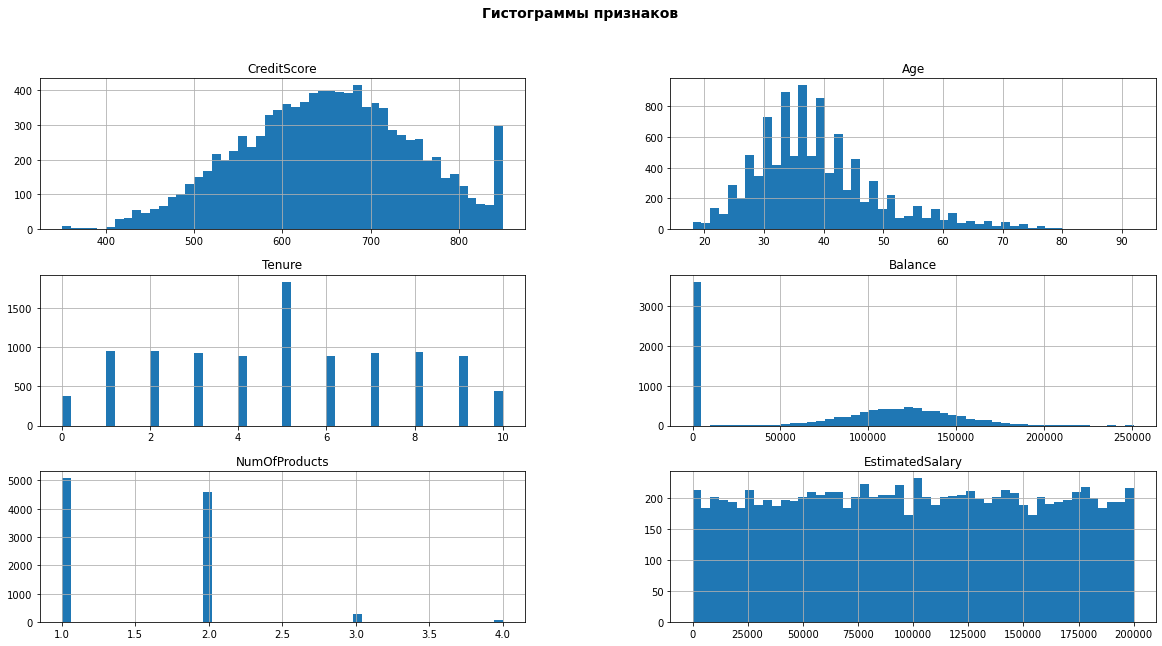

In [28]:
features[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].hist(bins=50, figsize=(20, 10))
plt.suptitle('Гистограммы признаков', fontsize=14, fontweight='bold')

Для маштабирования численные признаки 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' зафиксируем в переменной `numeric`:

In [29]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

Создадим объект для маштабирования и настроим его на обучающем наборе:

In [30]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Маштабируем численные признаки обучающей выборки:

In [31]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.04,0.95,0.36,0.77,-0.91,0,1,-0.12,1,0,0
9925,0.45,-0.10,-0.00,1.91,-0.91,1,1,-0.26,0,0,0
8746,0.10,-0.48,1.09,0.48,0.82,0,1,1.42,0,0,1
660,-0.18,0.19,-0.00,0.09,-0.91,1,1,-1.16,1,0,0
3610,-0.72,1.62,-1.46,0.88,-0.91,1,0,0.11,0,0,0


Маштабируем численные признаки валидационной выборки:

In [32]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6612,-1.52,2.38,-0.73,1.01,-0.91,0,1,0.01,0,0,0
519,0.59,1.81,0.36,0.21,-0.91,0,1,0.45,0,0,1
1609,-0.32,-0.38,1.09,0.89,-0.91,1,0,-0.60,0,0,0
3475,1.23,-0.76,-0.37,-0.24,0.82,1,1,-1.62,0,0,1
2707,-0.13,-0.10,-0.73,0.45,-0.91,0,0,0.34,0,0,0


Маштабируем численные признаки тестовой выборки:

In [33]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.50,1.43,-1.46,0.87,0.82,1,1,1.73,1,0,0
2083,-1.20,-1.43,-1.46,-1.22,-0.91,1,1,1.20,0,0,1
3234,-1.27,0.76,-1.46,-1.22,-0.91,1,0,-1.37,0,0,1
1551,0.83,1.24,0.72,-1.22,0.82,0,1,0.38,0,1,0
2344,0.66,0.95,-0.37,0.27,-0.91,1,0,-1.61,1,0,0


### Вывод

Исходный датасет содержит исторические данные о поведении клиентов и расторжении договоров с банком. Всего 10000 строк уникальных значений, дублей нет. Целевой признак (столбец `Exited` — факт ухода клиента) имеет только два категориальных значения 0 и 1, следовательно, имеем задачу бинарной классификации.

Для последующего машинного обучения исходные данные были оптимизированы:

- столбцы `RowNumber` (индекс строки в данных дублировал информацию стандартного датафрейма и не имел ценности для обучения модели), `CustomerId` (уникальный идентификатор клиента), `Surname` (фамилия являлся идентифицирующей клиента информацией) не помогут улучшить качества модели, поэтому были удалены
- для категориальных признаков `Geography` (страна проживания), `Gender`(пол) были преобразованы в численные признаки методом прямого кодирования
- в данных для количествнных признаков `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary` присутствовал разброс значений. Чтобы бОльшие значения признака не повлияли на алгоритмы, данные были маштабированы

В нашем случае не было отдельно выделенной тестовой выборки, поэтому существющие данные были разделены на три выборки:

- обучающую - 60% для обучения модели
- валидационную - 20% для выбора лучшего алгоритма и подбора оптимальных гиперпараметров
- тестовую - 20% для финального теста лучшей модели.

## Исследование задачи

### Прорверка баланса классов 

Исследуем баланс классов целевого признака для обучающей и валидационной выборок:

In [34]:
target_train.value_counts(normalize=1)

0   0.80
1   0.20
Name: Exited, dtype: float64

Text(0, 0.5, 'частота')

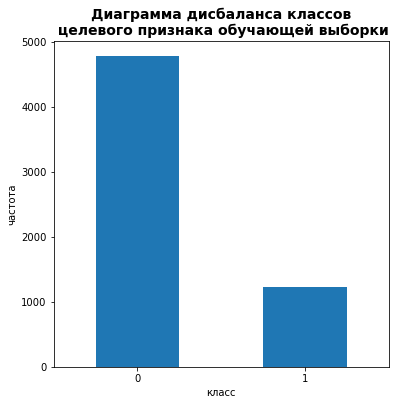

In [35]:
target_train.value_counts().plot.bar(figsize=(6, 6), rot=0)
plt.title('Диаграмма дисбаланса классов\n целевого признака обучающей выборки', fontsize=14, fontweight='bold')
plt.xlabel('класс')
plt.ylabel('частота')

In [36]:
target_valid.value_counts(normalize=1)

0   0.80
1   0.20
Name: Exited, dtype: float64

Text(0, 0.5, 'частота')

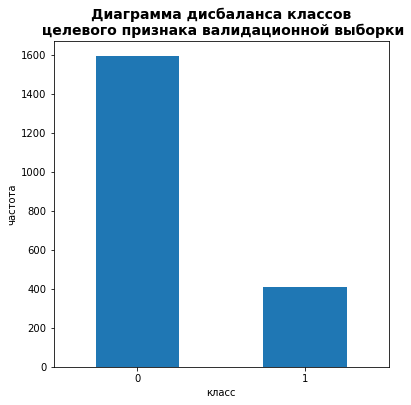

In [37]:
target_valid.value_counts().plot.bar(figsize=(6, 6), rot=0)
plt.title('Диаграмма дисбаланса классов\n целевого признака валидационной выборки', fontsize=14, fontweight='bold')
plt.xlabel('класс')
plt.ylabel('частота')

Для обучающией и валидационной выборок наблюдается заметный дисбаланс класов. Около 80% приходится на 0 и 20% - на 1.
Из этого можно предположить, что результаты предсказаний моделей будут сильно склоняться к одному варианту ответов. То есть смещение в сторону более популярного класса 0 может перейти и в обученную модель.

### Подбор гиперпараметров моделей

Сначала обучим модели без учета дисбаланса. Для обучения моделей будем использовать следующие три алгоритма классификации:
- Дерево решений - DecisionTreeClassifier (DT)
- Случайный лес - RandomForestClassifier (RF)
- Логистическую регрессию - LogisticRegression (LR)

Для автоматического подбора гиперпараметров для каждого алгоритма будем использовать инструмент GridSearchCV. Чтобы использовать всю мощь кросс-валидации:
- передадим в GridSearchCV все доступные данные (обучение + валидация)
- подбирать гиперпарамерты будем не по метрике accuracy, которая используется по умолчаниюпо, а по метрике F1
- с помощью `grid_rf.best_score_` для лучшего алгоритма будем сразу выводить метрику F1, усредненную всем 5 фолдам

In [38]:
grid_features = pd.concat([features_train, features_valid], ignore_index=True)
grid_features.shape

(8000, 11)

In [39]:
grid_target = pd.concat([target_train, target_valid], ignore_index=True)
grid_target.shape

(8000,)

In [40]:
f1 = make_scorer(f1_score)

In [41]:
model_dt = DecisionTreeClassifier(random_state=seed)

parametrs_dt = {'criterion': ['gini', 'entropy'],
                'max_depth': range(1, 11),
                'min_samples_leaf': range(1, 8),}
grid_dt = GridSearchCV(model_dt, parametrs_dt, cv=5, scoring=f1)
grid_dt.fit(grid_features, grid_target)

print('Лучшие значения для гиперпараметров алгоритма Дерева решений:\n', grid_dt.best_params_)
print('Усредненная по 5 фолдам метрика F1:', grid_dt.best_score_.round(2))

Лучшие значения для гиперпараметров алгоритма Дерева решений:
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3}
Усредненная по 5 фолдам метрика F1: 0.59


In [42]:
model_rf = RandomForestClassifier(random_state=seed)
parametrs_rf = {'max_features': ['auto', 'sqrt', 'log2'],
                'n_estimators': range(10, 51, 10),
                'max_depth': range(1, 11)}
grid_rf = GridSearchCV(model_rf, parametrs_rf, cv=5, scoring=f1)
grid_rf.fit(grid_features, grid_target)

print('Лучшие значения для гиперпараметров алгоритма Случайного леса:\n', grid_rf.best_params_)
print('Усредненная по 5 фолдам метрика F1:', grid_rf.best_score_.round(2))

Лучшие значения для гиперпараметров алгоритма Случайного леса:
 {'max_depth': 9, 'max_features': 'auto', 'n_estimators': 10}
Усредненная по 5 фолдам метрика F1: 0.57


In [43]:
model_lr = LogisticRegression(random_state=seed)
parametrs_lr = {'solver': ['sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear']}
grid_lr = GridSearchCV(model_lr, parametrs_lr, cv=5, scoring=f1)
grid_lr.fit(grid_features, grid_target)

print('Лучшие значения для гиперпараметров алгоритма Логистической регрессии:\n', grid_lr.best_params_)
print('Усредненная по 5 фолдам метрика F1:', grid_lr.best_score_.round(2))

Лучшие значения для гиперпараметров алгоритма Логистической регрессии:
 {'solver': 'liblinear'}
Усредненная по 5 фолдам метрика F1: 0.32


Для каждого из алгоритмов мы подобрали наилучшие значения гиперпараметров. Теперь можно сравнить метрики моделей.

### Сравнение метрик моделей

Напишем функцию для расчета метрик модели:

In [44]:
def modelscores(model, features_train, target_train, features_valid, target_valid):
    """Функция для расчета метрик модели.
    
    Для модели вычисляются следующие метрики: 
    качество, полнота, точность, F1-мера, AUC-ROC
    """
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions).round(2)
    recall = recall_score(target_valid, predictions).round(2)
    precision = precision_score(target_valid, predictions).round(2)
    f1 = f1_score(target_valid, predictions).round(2)
    probabilities_one_valid  = model.predict_proba(features_valid)[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid).round(2)

    print('Качество:', accuracy)
    print('Полнота:', recall)
    print('Точность:', precision)
    print('F1-мера:', f1)
    print('AUC-ROC:', auc_roc)
    
    return accuracy, recall, precision, f1, auc_roc, predictions

In [45]:
print('Метрики модели Дерева решений | Валидационная выборка')
model_dt = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=8, min_samples_leaf=3)
model_scores = modelscores(model_dt, features_train, target_train, features_valid, target_valid)

Метрики модели Дерева решений | Валидационная выборка
Качество: 0.86
Полнота: 0.48
Точность: 0.75
F1-мера: 0.59
AUC-ROC: 0.84


In [46]:
print('Метрики модели Случайного леса | Валидационная выборка')
model_rf = RandomForestClassifier(random_state=seed, max_depth=9, max_features='auto', n_estimators=10)
model_scores = modelscores(model_rf, features_train, target_train, features_valid, target_valid)

Метрики модели Случайного леса | Валидационная выборка
Качество: 0.86
Полнота: 0.47
Точность: 0.78
F1-мера: 0.59
AUC-ROC: 0.87


In [47]:
print('Метрики модели Логистической регрессии | Валидационная выборка')
model_lr = LogisticRegression(random_state=seed, solver='liblinear')
model_scores = modelscores(model_lr, features_train, target_train, features_valid, target_valid)

Метрики модели Логистической регрессии | Валидационная выборка
Качество: 0.81
Полнота: 0.21
Точность: 0.61
F1-мера: 0.31
AUC-ROC: 0.79


In [48]:
comparison = pd.DataFrame([['Дерево решений', 0.86, 0.48, 0.75, 0.59, 0.84],
                           ['Случайный лес', 0.86, 0.47, 0.78, 0.59, 0.84],
                           ['Логистическая регрессия', 0.81, 0.21, 0.61, 0.31, 0.84]],
                          columns=['модель', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison

,модель,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.86,0.48,0.75,0.59,0.84
1,Случайный лес,0.86,0.47,0.78,0.59,0.84
2,Логистическая регрессия,0.81,0.21,0.61,0.31,0.84


Text(0, 0.5, 'значение метрики')

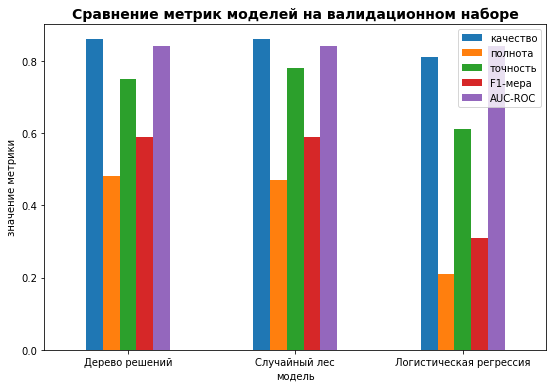

In [49]:
comparison.plot(kind='bar', x='модель', figsize=(9, 6), rot=0)
plt.title('Сравнение метрик моделей на валидационном наборе', fontsize=14, fontweight='bold')
plt.xlabel('модель')
plt.ylabel('значение метрики')

### ROC-кривые моделей

Text(0.5, 1.0, 'ROC-кривая модели Дерево решений')

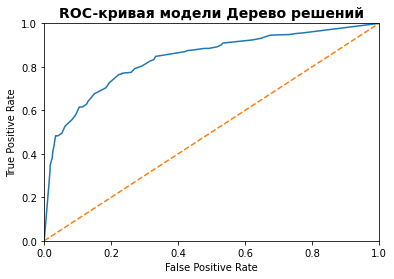

In [50]:
model_dt.fit(features_train, target_train)
fpr, tpr, thresholds = roc_curve(target_valid, model_dt.predict_proba(features_valid)[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели Дерево решений', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'ROC-кривая модели Случайного леса')

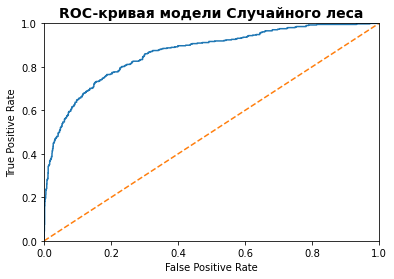

In [51]:
model_rf.fit(features_train, target_train)
fpr, tpr, thresholds = roc_curve(target_valid, model_rf.predict_proba(features_valid)[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели Случайного леса', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'ROC-кривая модели Логистической регрессии')

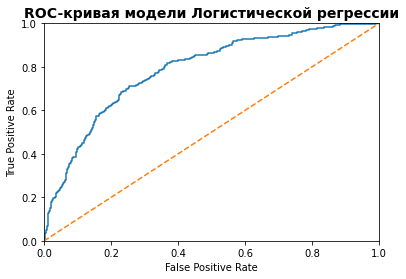

In [52]:
model_lr.fit(features_train, target_train)
fpr, tpr, thresholds = roc_curve(target_valid, model_lr.predict_proba(features_valid)[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели Логистической регрессии', fontsize=14, fontweight='bold')

### Сравнение доли верных ответов моделей

Проверим, какое соотношение ответов выдает каждая модель:

In [53]:
model_dt.fit(features_train, target_train)
predictions_dt = model_dt.predict(features_valid)
model_dt_share = pd.Series(predictions_dt).value_counts(normalize=1)
print(model_dt_share)

0   0.87
1   0.13
dtype: float64


In [54]:
model_rf.fit(features_train, target_train)
predictions_rf = model_rf.predict(features_valid)
model_rf_share = pd.Series(predictions_rf).value_counts(normalize=1)
print(model_rf_share)

0   0.88
1   0.12
dtype: float64


In [55]:
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_valid)
model_lr_share = pd.Series(predictions_lr).value_counts(normalize=1)
print(model_lr_share)

0   0.93
1   0.07
dtype: float64


### Сравнение с константной моделью

Сравним качество предсказаний с константной моделью, которая предсказывает только нули.

In [56]:
target_predict_constant = pd.Series([0] * len(target_valid))
target_predict_constant.shape

(2000,)

In [57]:
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant).round(2)
roc_auc_score_constant = roc_auc_score(target_valid, predictions_lr).round(2)
print('Качество:', accuracy_score_constant)
print('ROC-AUC-метрика:', roc_auc_score_constant)

Качество: 0.8
ROC-AUC-метрика: 0.59


### Сравнение матрицы ошибок

In [58]:
confusion_matrix(target_valid, predictions_dt)

array([[1526,   66],
       [ 211,  197]], dtype=int64)

In [59]:
confusion_matrix(target_valid, predictions_rf)

array([[1537,   55],
       [ 216,  192]], dtype=int64)

In [60]:
confusion_matrix(target_valid, predictions_lr)

array([[1538,   54],
       [ 324,   84]], dtype=int64)

In [61]:
confusion_matrix(target_valid, target_predict_constant)

array([[1592,    0],
       [ 408,    0]], dtype=int64)

### Вывод

Для обучения моделей использовались следующие три алгоритма классификации:

- Дерево решений - DecisionTreeClassifier (DT)
- Случайный лес - RandomForestClassifier (RF)
- Логистическую регрессию - LogisticRegression (LR)

Для автоматического подбора наилучших гиперпараметров на тренировочной выборке для каждого алгоритма применялся инструмент GridSearchCV.

В первоначальных данных наблюдается заметный дисбаланс класов. Около 80% приходилось на 0 и около 20% - на 1. Из-за этого результаты предсказаний моделей сильно склоняются к одному варианту ответов. То есть, смещение в сторону более популярного класса 0 переходит и в обученную модель. По этой причине обученные на этих данных модели не проходят проверку на адекватность. А также характеризуются высокой степенью ошибок и низким качеством взвешенной величины (F1-мера) и показывают низкие результаты точности и полноты. 

Необходимо предпринять меры по борьбе с дисбалансом классов.

## Борьба с дисбалансом

Улучшим качество модели, учитывая дисбаланс классов. Для этого опробуем три метода:
- взвешивание классов
- увеличения представления класса 1 в выборке
- уменьшения представления класса 0 в выборке

### Взвешивание классов

Чтобы бОльший вес был у редкого класса, для каждого алгоритма присвоим гиперпараметру `class_weight` значение 'balanced'.

In [62]:
print('Метрики модели Дерева решений (классы сбалансированы) | Валидационная выборка')
model_dt_balanced = DecisionTreeClassifier(random_state=seed, class_weight='balanced', criterion='entropy', max_depth=8, min_samples_leaf=3)
model_scores = modelscores(model_dt_balanced, features_train, target_train, features_valid, target_valid)

Метрики модели Дерева решений (классы сбалансированы) | Валидационная выборка
Качество: 0.79
Полнота: 0.74
Точность: 0.49
F1-мера: 0.59
AUC-ROC: 0.84


In [63]:
print('Метрики модели Случайного леса (классы сбалансированы) | Валидационная выборка')
model_rf_balanced = RandomForestClassifier(random_state=seed, class_weight='balanced', max_depth=9, max_features='auto', n_estimators=10)
model_scores = modelscores(model_rf_balanced, features_train, target_train, features_valid, target_valid)

Метрики модели Случайного леса (классы сбалансированы) | Валидационная выборка
Качество: 0.84
Полнота: 0.7
Точность: 0.59
F1-мера: 0.64
AUC-ROC: 0.87


In [64]:
print('Метрики модели Логистической регрессии (классы сбалансированы) | Валидационная выборка')
model_lr_balanced = LogisticRegression(random_state=seed, class_weight='balanced', solver='liblinear')
model_scores = modelscores(model_lr_balanced, features_train, target_train, features_valid, target_valid)

Метрики модели Логистической регрессии (классы сбалансированы) | Валидационная выборка
Качество: 0.73
Полнота: 0.74
Точность: 0.41
F1-мера: 0.53
AUC-ROC: 0.79


In [65]:
comparison_balanced = pd.DataFrame([['Дерево решений', 0.79, 0.74, 0.49, 0.59, 0.84],
                           ['Случайный лес', 0.84, 0.70, 0.59, 0.64, 0.87],
                           ['Логистическая регрессия', 0.73, 0.74, 0.41, 0.53, 0.79]],
                          columns=['сбалансированная модель', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison_balanced

,сбалансированная модель,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.79,0.74,0.49,0.59,0.84
1,Случайный лес,0.84,0.70,0.59,0.64,0.87
2,Логистическая регрессия,0.73,0.74,0.41,0.53,0.79


Text(0, 0.5, 'значение метрики')

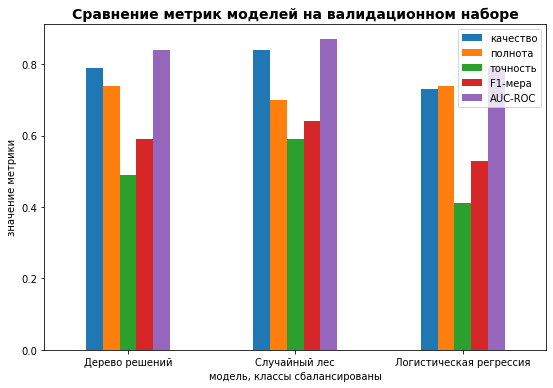

In [66]:
comparison_balanced.plot( kind='bar', x='сбалансированная модель', figsize=(9, 6), rot=0)
plt.title('Сравнение метрик моделей на валидационном наборе', fontsize=14, fontweight='bold')
plt.xlabel('модель, классы сбалансированы')
plt.ylabel('значение метрики')

### Увеличение выборки

Cоздадим функцию для увеличения представления класса 1 в выборке: 

In [67]:
def upsample(features, target, repeat):
    """Функция для увеличения представления класса 1 в выборке.
    
    Преобразование проходит в несколько этапов:
    Обучающая выборка разделяется на отрицательные и положительные объекты;
    Положительные оложительные объекты копируются repeat раз;
    С учётом полученных данных создается новая обучающая выборка;
    Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=seed)
    return features_upsampled, target_upsampled

In [68]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1   0.51
0   0.49
Name: Exited, dtype: float64
(9666,)


In [69]:
print('Метрики модели Дерева решений (представление класса 1 увеличено) | Валидационная выборка')
model_dt_upsampled = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=8, min_samples_leaf=3)
model_scores = modelscores(model_dt_upsampled, features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Метрики модели Дерева решений (представление класса 1 увеличено) | Валидационная выборка
Качество: 0.79
Полнота: 0.73
Точность: 0.5
F1-мера: 0.59
AUC-ROC: 0.83


In [70]:
print('Метрики модели Случайного леса (представление класса 1 увеличено) | Валидационная выборка')
model_rf_upsampled = RandomForestClassifier(random_state=seed, max_depth=9, max_features='auto', n_estimators=10)
model_scores = modelscores(model_rf_upsampled, features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Метрики модели Случайного леса (представление класса 1 увеличено) | Валидационная выборка
Качество: 0.83
Полнота: 0.75
Точность: 0.56
F1-мера: 0.64
AUC-ROC: 0.87


In [71]:
print('Метрики модели Логистической регрессии (представление класса 1 увеличено) | Валидационная выборка')
model_lr_upsampled = LogisticRegression(random_state=seed, solver='liblinear')
model_scores = modelscores(model_lr_upsampled, features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Метрики модели Логистической регрессии (представление класса 1 увеличено) | Валидационная выборка
Качество: 0.73
Полнота: 0.74
Точность: 0.41
F1-мера: 0.52
AUC-ROC: 0.79


In [72]:
comparison_upsampled = pd.DataFrame([['Дерево решений', 0.79, 0.73, 0.50, 0.59, 0.83],
                           ['Случайный лес', 0.83, 0.75, 0.56, 0.64, 0.87],
                           ['Логистическая регрессия', 0.73, 0.74, 0.41, 0.52, 0.79]],
                          columns=['модель увеличение выборки', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison_upsampled

,модель увеличение выборки,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.79,0.73,0.50,0.59,0.83
1,Случайный лес,0.83,0.75,0.56,0.64,0.87
2,Логистическая регрессия,0.73,0.74,0.41,0.52,0.79


Text(0, 0.5, 'значение метрики')

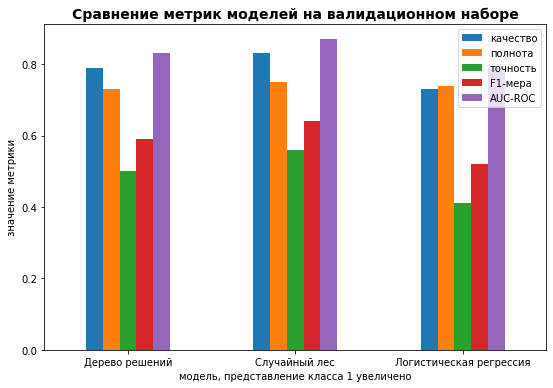

In [73]:
comparison_upsampled.plot( kind='bar', x='модель увеличение выборки', figsize=(9, 6), rot=0)
plt.title('Сравнение метрик моделей на валидационном наборе', fontsize=14, fontweight='bold')
plt.xlabel('модель, представление класса 1 увеличено')
plt.ylabel('значение метрики')

### Уменьшение выборки

Cоздадим функцию для уменьшения представления класса 0 в выборке:

In [74]:
def downsample(features, target, fraction):
    """Функция для уменьшения представления класса 0 в выборке.
    
    Преобразование проходит в несколько этапов:
    Обучающая выборка разделяется на отрицательные и положительные объекты;
    Случайным образом часть из отрицательных объектов отбрасывается;
    С учётом полученных данных создается новая обучающая выборка;
    Данные пермешиваются. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=seed)
    return features_downsampled, target_downsampled

In [75]:
features_train_downsample, target_train_downsample = downsample(features_train, target_train, 0.25)
print(target_train_downsample.value_counts(normalize = 1))
print(target_train_downsample.shape)

1   0.51
0   0.49
Name: Exited, dtype: float64
(2416,)


In [76]:
print('Метрики модели Дерева решений (представление класса 0 уменьшено) | Валидационная выборка')
model_dt_downsample = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=8, min_samples_leaf=3)
model_scores = modelscores(model_dt_downsample, features_train_downsample, target_train_downsample, features_valid, target_valid)

Метрики модели Дерева решений (представление класса 0 уменьшено) | Валидационная выборка
Качество: 0.78
Полнота: 0.76
Точность: 0.47
F1-мера: 0.58
AUC-ROC: 0.84


In [77]:
print('Метрики модели Случайного леса (представление класса 0 уменьшено) | Валидационная выборка')
model_rf_downsample = RandomForestClassifier(random_state=seed, max_depth=9, max_features='auto', n_estimators=10)
model_scores = modelscores(model_rf_downsample, features_train_downsample, target_train_downsample, features_valid, target_valid)

Метрики модели Случайного леса (представление класса 0 уменьшено) | Валидационная выборка
Качество: 0.78
Полнота: 0.75
Точность: 0.48
F1-мера: 0.58
AUC-ROC: 0.85


In [78]:
print('Метрики модели Логистической регрессии (представление класса 0 уменьшено) | Валидационная выборка')
model_lr_downsample = LogisticRegression(random_state=seed, solver='liblinear')
model_scores = modelscores(model_lr_downsample, features_train_downsample, target_train_downsample, features_valid, target_valid)

Метрики модели Логистической регрессии (представление класса 0 уменьшено) | Валидационная выборка
Качество: 0.73
Полнота: 0.75
Точность: 0.41
F1-мера: 0.53
AUC-ROC: 0.79


In [79]:
comparison_downsample = pd.DataFrame([['Дерево решений', 0.78, 0.76, 0.47, 0.58, 0.84],
                           ['Случайный лес', 0.78, 0.75, 0.48, 0.58, 0.85],
                           ['Логистическая регрессия', 0.73, 0.75, 0.41, 0.53, 0.79]],
                          columns=['модель уменьшение выборки', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison_downsample

,модель уменьшение выборки,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.78,0.76,0.47,0.58,0.84
1,Случайный лес,0.78,0.75,0.48,0.58,0.85
2,Логистическая регрессия,0.73,0.75,0.41,0.53,0.79


Text(0, 0.5, 'значение метрики')

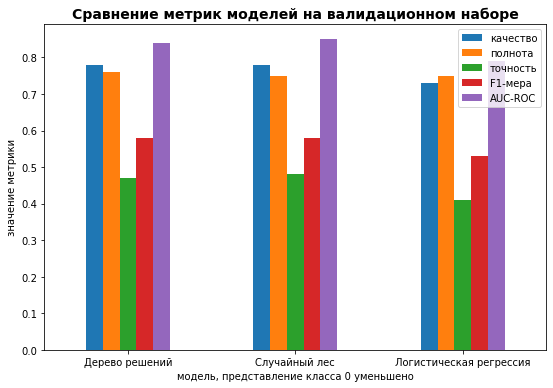

In [80]:
comparison_downsample.plot( kind='bar', x='модель уменьшение выборки', figsize=(9, 6), rot=0)
plt.title('Сравнение метрик моделей на валидационном наборе', fontsize=14, fontweight='bold')
plt.xlabel('модель, представление класса 0 уменьшено')
plt.ylabel('значение метрики')

In [81]:
comparison

,модель,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.86,0.48,0.75,0.59,0.84
1,Случайный лес,0.86,0.47,0.78,0.59,0.84
2,Логистическая регрессия,0.81,0.21,0.61,0.31,0.84


In [82]:
comparison_balanced

,сбалансированная модель,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.79,0.74,0.49,0.59,0.84
1,Случайный лес,0.84,0.70,0.59,0.64,0.87
2,Логистическая регрессия,0.73,0.74,0.41,0.53,0.79


In [83]:
comparison_upsampled

,модель увеличение выборки,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.79,0.73,0.50,0.59,0.83
1,Случайный лес,0.83,0.75,0.56,0.64,0.87
2,Логистическая регрессия,0.73,0.74,0.41,0.52,0.79


In [84]:
comparison_downsample

,модель уменьшение выборки,качество,полнота,точность,F1-мера,AUC-ROC
0,Дерево решений,0.78,0.76,0.47,0.58,0.84
1,Случайный лес,0.78,0.75,0.48,0.58,0.85
2,Логистическая регрессия,0.73,0.75,0.41,0.53,0.79


In [85]:
comparison_rf = pd.DataFrame([['Не сбалансированная модель', 0.86, 0.47, 0.78, 0.59, 0.84],
                              ['Метод взвешивания классов', 0.84, 0.77, 0.59, 0.64, 0.87],
                              ['Модель с увеличением выборки', 0.83, 0.75, 0.56, 0.64, 0.87],
                              ['Модель с уменьшением выборки', 0.78, 0.75, 0.48, 0.58, 0.85]],
                          columns=['модель Случайного леса', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison_rf

,модель Случайного леса,качество,полнота,точность,F1-мера,AUC-ROC
0,Не сбалансированная модель,0.86,0.47,0.78,0.59,0.84
1,Метод взвешивания классов,0.84,0.77,0.59,0.64,0.87
2,Модель с увеличением выборки,0.83,0.75,0.56,0.64,0.87
3,Модель с уменьшением выборки,0.78,0.75,0.48,0.58,0.85


Text(0, 0.5, 'значение метрики')

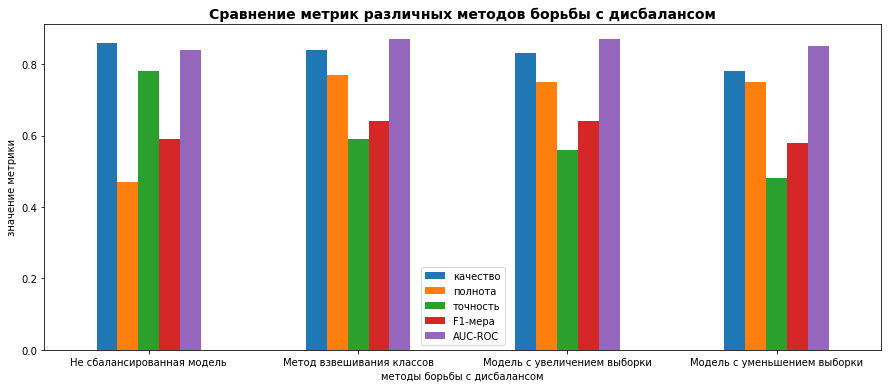

In [86]:
comparison_rf.plot( kind='bar', x='модель Случайного леса', figsize=(15, 6), rot=0)
plt.title('Сравнение метрик различных методов борьбы с дисбалансом', fontsize=14, fontweight='bold')
plt.xlabel('методы борьбы с дисбалансом')
plt.ylabel('значение метрики')

### Вывод

По результатам проведенных экспериментов лучшие показатели были у модели, использующей алгоритм Случайного леса (RandomForestClassifier) и стратегию борьбы с дисбалансом - метод взвешивания классов:

- Полнота: 0.77
- Точность: 0.59
- F1-мера: 0.64
- AUC-ROC: 0.87


Финальные гиперпараметры выбранной модели Случайного леса следующие:

- random_state=12345
- class_weight='balanced'
- max_depth=9
- max_features='auto'
- n_estimators=10

## Тестирование модели

Проведем финальное тестирование. Модель будем обучать на всех доступных данных (обучающая + валидационная выборки):

In [87]:
model_rf_balanced_test = RandomForestClassifier(random_state=seed, class_weight='balanced', max_depth=9, max_features='auto', n_estimators=10)
model_rf_balanced_test.fit(grid_features, grid_target)
model_scores = modelscores(model_rf_balanced_test, grid_features, grid_target, features_test, target_test)

Качество: 0.82
Полнота: 0.64
Точность: 0.55
F1-мера: 0.6
AUC-ROC: 0.84


Text(0.5, 1.0, 'ROC-кривая модели Случайного леса')

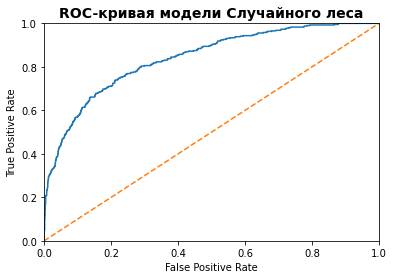

In [88]:
model_rf_balanced_test.fit(grid_features, grid_target)
fpr, tpr, thresholds = roc_curve(target_test, model_rf_balanced_test.predict_proba(features_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели Случайного леса', fontsize=14, fontweight='bold')

In [89]:
comparison_rf_fin = pd.DataFrame([['Исходная модель, классы не сбалансированы', 0.86, 0.47, 0.78, 0.59, 0.84],
                              ['Подбор параметров, классы сбалансированы', 0.84, 0.77, 0.59, 0.64, 0.87],
                              ['Финальное тестирование', 0.82, 0.64, 0.55, 0.60, 0.84]],
                          columns=['модель Случайного леса', 'качество', 'полнота', 'точность', 'F1-мера', 'AUC-ROC'])
comparison_rf_fin

,модель Случайного леса,качество,полнота,точность,F1-мера,AUC-ROC
0,"Исходная модель, классы не сбалансированы",0.86,0.47,0.78,0.59,0.84
1,"Подбор параметров, классы сбалансированы",0.84,0.77,0.59,0.64,0.87
2,Финальное тестирование,0.82,0.64,0.55,0.60,0.84


Text(0, 0.5, 'значение метрики')

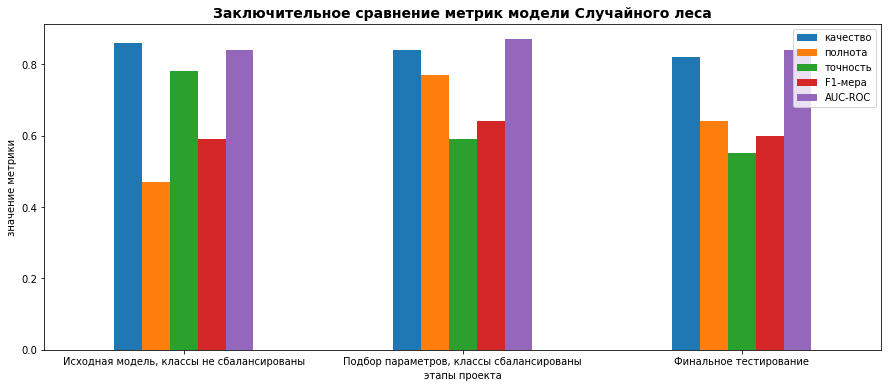

In [90]:
comparison_rf_fin.plot( kind='bar', x='модель Случайного леса', figsize=(15, 6), rot=0)
plt.title('Заключительное сравнение метрик модели Случайного леса', fontsize=14, fontweight='bold')
plt.xlabel('этапы проекта')
plt.ylabel('значение метрики')

### Вывод по результатам исследования

- В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными). По этой причине обученные на этих данных модели не проходили проверку на адекватность. А также характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1-мера) и показывали низкие результаты точности и полноты.
- Для устранения дисбаланс классов в обучающей выборки было перепробовано три метода: 
    - взвешивание классов, 
    - увеличение количества значений позитивного класса в 4 раза методом upsampling,
    - уменьшение количества значений негативного класса в 4 раза методом downsample. 
- На новых данных все модели показали результат выше, чем на несбалансированной выборке. Но лучшие показатели были у модели Случайного леса (метод взвешивания классов):
    - Качество: 0.84
    - Полнота: 0.77
    - Точность: 0.59
    - F1-мера: 0.64
    - AUC-ROC: 0.87

- Финальные гиперпараметры выбранной модели Случайного леса (RandomForestClassifier) следующие:
    - random_state=12345
    - class_weight='balanced'
    - max_depth=9
    - max_features='auto'
    - n_estimators=10
- Результаты модели на тестовой выборке:
    - Качество: 0.82
    - Полнота: 0.64
    - Точность: 0.55
    - F1-мера: 0.6
    - AUC-ROC: 0.84
- В сравнении с контантной моделью финальная модель прошла проверку на адекватность:
    - accuracy_score (качество) константой модели: 0.80
    - accuracy_score (качество) финальной модели: 0.82
    - AUC-ROC константой модели: 0.59
    - AUC-ROC финальной модели: 0.84